In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


Open Dataset in Pandas Dataframe

In [ ]:
df = pd.read_csv("heart_disease.csv")
target = df.pop('HeartDiseaseorAttack')

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [ ]:
# Convert the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

In [ ]:
predictions = model.predict(X_test)

# Convert the predictions to a binary class
predictions = (predictions > 0.5).astype(int)
predictions = [pred[0] for pred in predictions]
predictions = np.array(predictions)

In [ ]:
# Showing relevant information about the Neural Networks model
y_true = y_test.numpy().astype(int)
test_acc = sum(predictions == y_true) / len(y_true)
Hc = sum(y_true == 0)
Sick = sum(y_true == 1)
PredHc = sum(predictions == 0)
PredSick = sum(predictions == 1)
print("Subjects:", len(y_true))
print("Actual Healthy Subjects:", Hc)
print("Actual Sick Subjects:", Sick)
print("Predicted Healthy Subjects:", Hc)
print("Predicted Sick Subjects:", Sick)
print("Test Set Accuracy:", test_acc)

In [ ]:
# Showing the results of the Neural Networks model through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, predictions)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, predictions))

Result: High Accuracy, High Bias

Decision Tree Classifier, with and without K-Folds doubling the weight for Sick label

In [ ]:
# Create the model
model = DecisionTreeClassifier()

# Create the KFold object with 5 folds
kfold = KFold(n_splits=5, shuffle=True)

# Initialize a list to store the evaluation metrics for each fold
eval_metrics = []

In [ ]:
X = df.values
y = target.values
sample_weight = tf.where(y_train == 1, 2, 1)

# Iterate over the folds
for train_index, test_index in kfold.split(X):
    # Split the data into train and test sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the train set
    model.fit(X_train, y_train, sample_weight=sample_weight)

     # Evaluate the model on the test set
    score = model.score(X_test, y_test)
    print(f'Test score: {score:.2f}')

# Calculate the mean and standard deviation of the evaluation metrics
mean_accuracy = np.mean([x[0] for x in eval_metrics])
std_accuracy = np.std([x[0] for x in eval_metrics])
mean_f1_score = np.mean([x[1] for x in eval_metrics])
std_f1_score = np.std([x[1] for x in eval_metrics])

print(f'Mean accuracy: {mean_accuracy:.3f} (+/- {std_accuracy:.3f})')
print(f'Mean F1 score: {mean_f1_score:.3f} (+/- {std_f1_score:.3f})')

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, sample_weight=sample_weight)

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

In [ ]:
# Showing the results through a confusion matrix of the Decision Tree Classifier model without K-folds and doubling the weight
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, y_pred))

Result: Lower accuracy and Lower Bias

Random Forest Classifier

In [ ]:
# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

In [ ]:
# Showing the results of the Random Forest Classifier through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, y_pred))

Result: High Accuracy, High Bias

Neural Networks using SMOTE

In [ ]:
X = df.values
y = target.values

# Create a SMOTE object
smote = SMOTE()

# Use the SMOTE object to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# Convert the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
11490/11490 [==============================] - 32s 3ms/step - loss: 0.4713 - accuracy: 0.7783
Epoch 2/10
11490/11490 [==============================] - 32s 3ms/step - loss: 0.4047 - accuracy: 0.8152
Epoch 3/10
11490/11490 [==============================] - 44s 4ms/step - loss: 0.3634 - accuracy: 0.8322
Epoch 4/10
11490/11490 [==============================] - 31s 3ms/step - loss: 0.3363 - accuracy: 0.8445
Epoch 5/10
11490/11490 [==============================] - 32s 3ms/step - loss: 0.3100 - accuracy: 0.8579
Epoch 6/10
11490/11490 [==============================] - 32s 3ms/step - loss: 0.2849 - accuracy: 0.8705
Epoch 7/10
11490/11490 [==============================] - 31s 3ms/step - loss: 0.2694 - accuracy: 0.8773
Epoch 8/10
11490/11490 [==============================] - 31s 3ms/step - loss: 0.2614 - accuracy: 0.8805
Epoch 9/10
11490/11490 [==============================] - 33s 3ms/step - loss: 0.2584 - accuracy: 0.8817
Epoch 10/10
11490/11490 [==============================

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

2873/2873 [==============================] - 6s 2ms/step - loss: 0.2584 - accuracy: 0.8829


In [ ]:
predictions = model.predict(X_test)

# Convert the predictions to a binary class
predictions = (predictions > 0.5).astype(int)
predictions = [pred[0] for pred in predictions]
predictions = np.array(predictions)

2873/2873 [==============================] - 4s 1ms/step


In [ ]:
# Showing relevant information about the Neural Networks model with SMOTE
y_true = y_test.numpy().astype(int)
test_acc = sum(predictions == y_true) / len(y_true)
Hc = sum(y_true == 0)
Sick = sum(y_true == 1)
PredHc = sum(predictions == 0)
PredSick = sum(predictions == 1)
print("Subjects:", len(y_true))
print("Actual Healthy Subjects:", Hc)
print("Actual Sick Subjects:", Sick)
print("Predicted Healthy Subjects:", Hc)
print("Predicted Sick Subjects:", Sick)
print("Test Set Accuracy:", test_acc)

Subjects: 91915
Actual Healthy Subjects: 46121
Actual Sick Subjects: 45794
Predicted Healthy Subjects: 46121
Predicted Sick Subjects: 45794
Test Set Accuracy: 0.8828700429744873


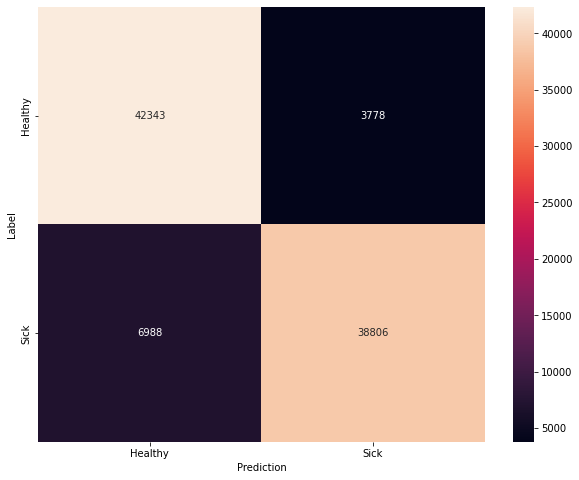

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     46121
         1.0       0.91      0.85      0.88     45794

    accuracy                           0.88     91915
   macro avg       0.88      0.88      0.88     91915
weighted avg       0.88      0.88      0.88     91915



In [ ]:
# Showing the results of the NN model with SMOTE through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, predictions)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, predictions))

Result: Decent Accuracy and Low Bias

Decision Tree Classifier using SMOTE

In [ ]:
# Create the model
model = DecisionTreeClassifier()

Using same SMOTED training and test datasets as Neural Networks

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.92
F1 score: 0.92


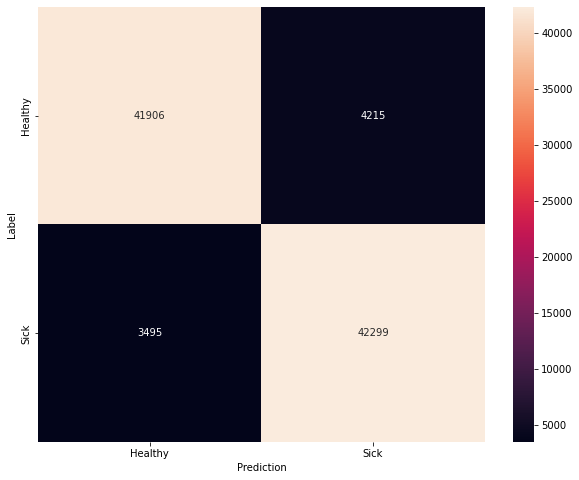

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     46121
         1.0       0.91      0.92      0.92     45794

    accuracy                           0.92     91915
   macro avg       0.92      0.92      0.92     91915
weighted avg       0.92      0.92      0.92     91915



In [ ]:
# Showing the results of the Decision Tree Classifier with SMOTE through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, y_pred))

Result: High Accuracy, even lower Bias

Random Forest Classifier using SMOTE

In [ ]:
# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10)

Same SMOTED Training and Test Datasets as DT and NN

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.91
F1 score: 0.91


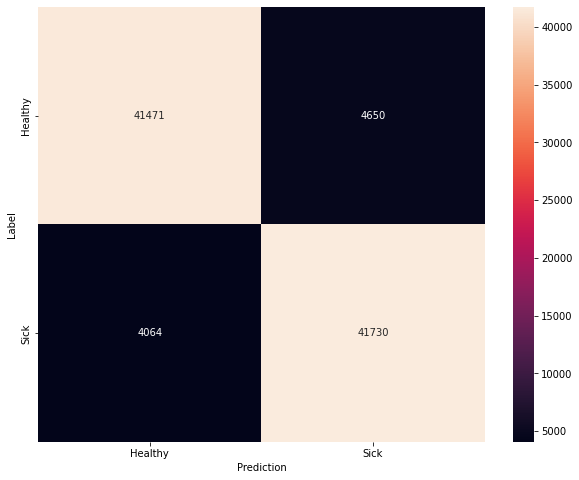

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90     46121
         1.0       0.90      0.91      0.91     45794

    accuracy                           0.91     91915
   macro avg       0.91      0.91      0.91     91915
weighted avg       0.91      0.91      0.91     91915



In [ ]:
# Showing the results of the Random Forest Classifier with SMOTE through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, y_pred))

Similar result as Decision Tree